Считаем файл


2.1 2 2
Date
2019-04-05 14:00:00    831.156938
2019-04-05 14:10:00    807.921000
2019-04-05 14:20:00    722.121375
2019-04-05 14:30:00    735.385688
2019-04-05 14:40:00    902.545062
                          ...    
2019-04-12 13:10:00    235.294344
2019-04-12 13:20:00    469.788437
2019-04-12 13:30:00    464.807062
2019-04-12 13:40:00    343.407438
2019-04-12 13:50:00    180.682844
Name: VES1, Length: 1008, dtype: float64


<AxesSubplot:xlabel='Date'>

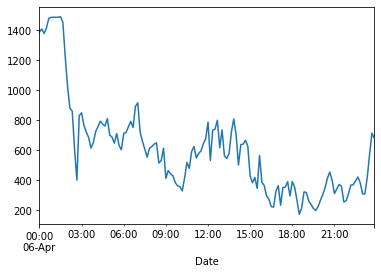

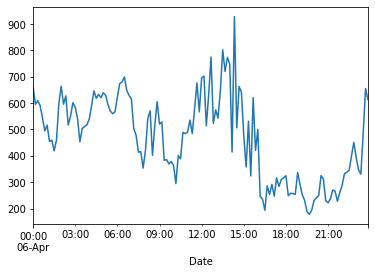

In [46]:
import pandas as pd
import matplotlib.pyplot as plt


print(2.1, 2,2)
DF=pd.read_csv('VES_FinalDataset.csv',
                        sep=';',
                        decimal=',',
                        encoding='latin1',
                        parse_dates=['Date'],
                        dayfirst=True,
                        index_col='Date')

print(DF['VES1'])
DF['VES1']=pd.to_numeric(DF['VES1'])
DF['VES2']=pd.to_numeric(DF['VES2'])
plt.figure()
DF['VES1'][60:204].plot()
plt.figure()
DF['VES2'][60:204].plot()

Уход от отирицательных значений активной мощности


In [47]:
DF[DF < 0] = 0.01

Проверка минимального значения

In [48]:
import numpy as np

print(np.nanmin(DF['VES2']))


0.01


### Начало работы с алгоритмами оптимизации

##### Фильтр Ходрика Прескотта

###### ВЭС 1

<AxesSubplot:xlabel='Date'>

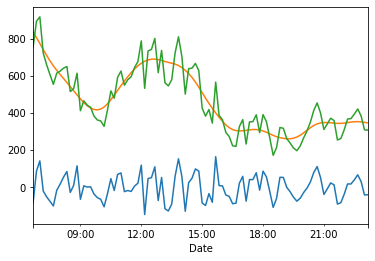

In [49]:
import statsmodels.api as sm

lambd=100 #

HP_cycle_VES1, HP_trend_VES1 = sm.tsa.filters.hpfilter(DF['VES1'][100:200], lamb=lambd)

HP_cycle_VES1.plot()
HP_trend_VES1.plot()
DF['VES1'][100:200].plot()

###### ВЭС 2

<AxesSubplot:xlabel='Date'>

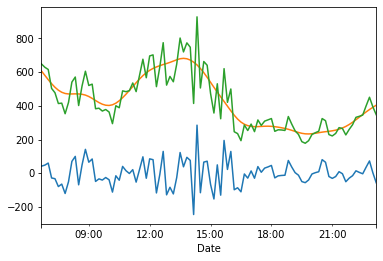

In [50]:

HP_cycle_VES2, HP_trend_VES2 = sm.tsa.filters.hpfilter(DF['VES2'][100:200], lamb=lambd)

HP_cycle_VES2.plot()
HP_trend_VES2.plot()
DF['VES2'][100:200].plot()

##### Фильтр Савицкого-Голея

###### ВЭС 1

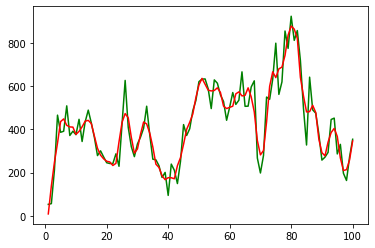

In [51]:
from scipy.signal import savgol_filter



dt=DF['VES1'][400:500].to_numpy()

x=np.array(range(1, int(100) + 1))

ySavGolFilter = savgol_filter(dt, 7, 2) # window size 7, polynomial order 2
plt.plot(x, dt, color='green')
plt.plot(x, ySavGolFilter, color='red')
plt.show()

###### ВЭС 2

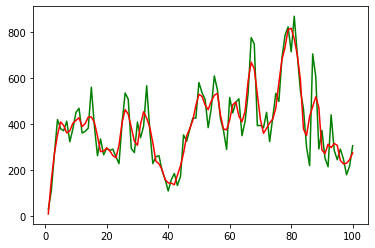

In [52]:
from scipy.signal import savgol_filter



dt=DF['VES2'][400:500].to_numpy()

x=np.array(range(1, int(100) + 1))

ySavGolFilter = savgol_filter(dt, 7, 2) # window size 7, polynomial order 2
plt.plot(x, dt, color='green')
plt.plot(x, ySavGolFilter, color='red')
plt.show()

##### На основе блока скользящего среднего (путем свертки)

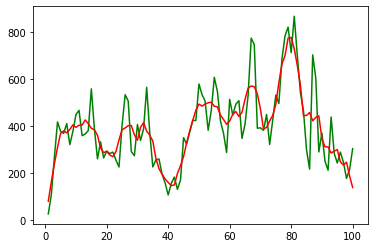

In [53]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


plt.plot(x, dt, color='green')
plt.plot(x, smooth(dt,5), color='red')
plt.show()

### Введем батарею и все такое

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
  (7, 7)	1.0
  (8, 8)	1.0
  (9, 9)	1.0
  (10, 10)	1.0
  (11, 11)	1.0
  (12, 12)	1.0
  (13, 13)	1.0
  (14, 14)	1.0
  (15, 15)	1.0
  (16, 16)	1.0
  (17, 17)	1.0
  (18, 18)	1.0
  (19, 19)	1.0
  (20, 20)	1.0
  (21, 21)	1.0
  (22, 22)	1.0
  (23, 23)	1.0
  (24, 24)	1.0
  :	:
  (75, 75)	1.0
  (76, 76)	1.0
  (77, 77)	1.0
  (78, 78)	1.0
  (79, 79)	1.0
  (80, 80)	1.0
  (81, 81)	1.0
  (82, 82)	1.0
  (83, 83)	1.0
  (84, 84)	1.0
  (85, 85)	1.0
  (86, 86)	1.0
  (87, 87)	1.0
  (88, 88)	1.0
  (89, 89)	1.0
  (90, 90)	1.0
  (91, 91)	1.0
  (92, 92)	1.0
  (93, 93)	1.0
  (94, 94)	1.0
  (95, 95)	1.0
  (96, 96)	1.0
  (97, 97)	1.0
  (98, 98)	1.0
  (99, 99)	1.0 I
  (0, 2)	1.0
  (0, 1)	-2.0
  (0, 0)	1.0
  (1, 0)	-2.0
  (1, 3)	1.0
  (1, 2)	-4.0
  (1, 1)	5.0
  (2, 0)	1.0
  (2, 1)	-4.0
  (2, 4)	1.0
  (2, 3)	-4.0
  (2, 2)	6.0
  (3, 1)	1.0
  (3, 2)	-4.0
  (3, 5)	1.0
  (3, 4)	-4.0
  (3, 3)	6.0
  (4, 2)	1.0
  (4, 3)	-4.0
  (4, 6

<AxesSubplot:xlabel='Date'>

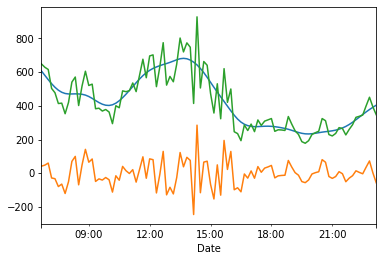

In [54]:
batterySize=1500000
BESS_charge=True
BESS_status=0

import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
from statsmodels.tools.validation import array_like, PandasWrapper


def hpfilter(x, lamb=1600):

    pw = PandasWrapper(x)
    x = array_like(x, 'x', ndim=1)
    nobs = len(x)
    I = sparse.eye(nobs, nobs)  # noqa:E741
    offsets = np.array([0, 1, 2])
    data = np.repeat([[1.], [-2.], [1.]], nobs, axis=1)
    K = sparse.dia_matrix((data, offsets), shape=(nobs - 2, nobs))

    use_umfpack = True
    print(I, 'I')
    print(K.T.dot(K), 'K')
    # if (BESS_charge == True):
    #
    #     print('hai')
    # else:
    #     print('not hai')

    trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)

    cycle = x - trend
    return pw.wrap(cycle, append='cycle'), pw.wrap(trend, append='trend')

HP_trend_test, HP_cycle_test = hpfilter(DF['VES2'][100:200], lamb=lambd)
HP_cycle_test.plot()
HP_trend_test.plot()
DF['VES2'][100:200].plot()